Analisis de Simple sintonizados




In [11]:
import pandas as pd
import numpy as np
import scipy as sp
from math import cos, log10 
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image  
from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

def dB(a):
    return 20*np.log10(a)

In [2]:
#Simple Sintonizado
# calcula Q y F
# Simple Sintonizado 
def FiltroSS(fo,BW,m):
    k = list()
    for n in range(m):
        Qi = (((2)**(1/m) -1 )**.5) /((1+BW/2/fo)**2-1)
        Fi = fo 
        k.append((Qi,Fi))
    return k

#Butterworth
def FiltroBT(fo,BW,m):
    k = list()
    for n in range(m):
        Qi = fo/BW/np.sin((2*n+1)/m*np.pi/2)
        Fi = fo - BW/2*np.cos((2*n+1)/m*np.pi/2)
        k.append((Qi,Fi))
    return k

#Chevishev
def FiltroCV(fo,BW,m):
    k = list()
    for n in range(m):
        Qi = (fo/BW/np.sin((2*n+1)/m*np.pi/2))/np.sinh(0.88137/m)
        Fi = fo - BW/2*np.cos((2*n+1)/m*np.pi/2)*np.cosh(0.88137/m)
        k.append((Qi,Fi))
    return k


def SSi(f,a,fo,Q,g):
    return g*a/(1+ (Q*((f/fo)**2-1))**2)**0.5

#Respuesta 
def RSS(freq,   a, fo, Q , g):
    a = np.array([SSi(f,a,fo,Q,g) for f in freq])
    return a

def Filtro( freq,a,kf, g):
    af = [a[i] for i in range(len(a))]
    for (Q,fo) in kf:
        for i, a in enumerate(af):
            af[i] = SSi(freq[i],a,fo,Q,g)
    return af

In [4]:
#Datos
BWo = 0.02
fco = 100
fif = 10
fif2= 0.5
dfch= 0.05
# Foscilador
fol  = fco + fif 
fol2 = fif + fif2 

# imagen
fig    = fol+2*fif
fig2   = fol2+2*fif2

In [5]:
# Defino el sampleo 
fmax = 500         # MHz
Fs   = fmax*2 #Sps 

# Ventana de tiempo del analisis 
StepFourier = 0.001 # MHz
T           = 1/StepFourier 

# Array de tiempo 
time  = np.arange(0, T, 1/Fs)

# Numero de elementos de time
nt    = len(time)

# Espectro de la frecuencia
# la separacion de las deltas = 1/T 
freq  =  np.arange(0,fmax,1/T)
atest =  np.array([1 for f in freq]) 

[(32.01961457241704, 100), (32.01961457241704, 100)]
|A( 99.0  MHz)|= [-2.95977756] dB
|A( 99.99  MHz)|= [-0.00035617] dB
|A( 100.01  MHz)|= [-0.00035624] dB
|A( 101.0  MHz)|= [-3.01029996] dB
|A( 20.5  MHz)|= [-59.48003765] dB


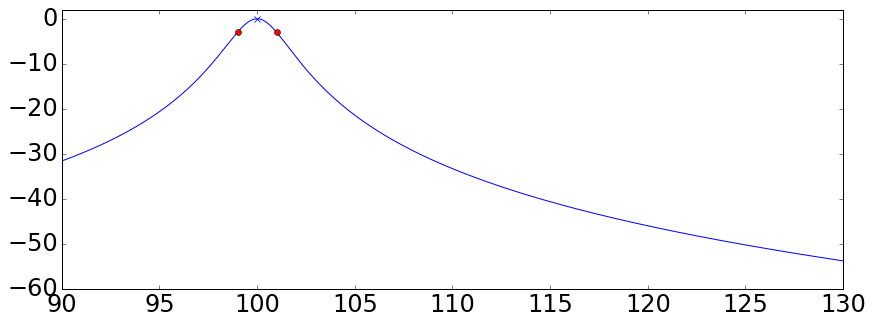

In [10]:
#Filtro RF  para eliminar frecuencia imagen
grf   = 1  # atenuacion
m     = 2  # numero de etapas
BWrf  = 2 # ancho de banda  
krf = FiltroSS(fco,BWrf,m)
print(krf)

k  = krf
fo = fco
BW = BWrf
fol= fol
fci  = fo - BW/2
fcs  = fo + BW/2
fcos = fo+BWo/2
fcoi = fo-BWo/2
fimg = fol+fif

Ao = dB(Filtro([fo  ],[1],k,1))

print('|A(',fci ,' MHz)|=',dB(Filtro([fci ],[1],k,1))-Ao, 'dB') 
print('|A(',fcoi,' MHz)|=',dB(Filtro([fcoi],[1],k,1))-Ao, 'dB') 
print('|A(',fcos,' MHz)|=',dB(Filtro([fcos],[1],k,1))-Ao, 'dB') 
print('|A(',fcs ,' MHz)|=',dB(Filtro([fcs ],[1],k,1))-Ao, 'dB') 
print('|A(',fimg,' MHz)|=',dB(Filtro([fimg],[1],k,1))-Ao, 'dB') 

plt.plot(freq,20*np.log10(Filtro(freq,atest,k,1)))

plt.plot(fimg,dB(Filtro([fimg],[1],k,1)) ,'ro')
plt.plot(fci ,dB(Filtro([fci ],[1],k,1)) ,'ro')
plt.plot(fcs ,dB(Filtro([fcs ],[1],k,1)) ,'ro')
plt.plot(fcos,dB(Filtro([fcos],[1],k,1)) ,'bx')
plt.plot(fcoi,dB(Filtro([fcoi],[1],k,1)) ,'bx')
plt.xlim([90, 130])
plt.ylim([-60 , 2])
plt.show()

[(50.000000000000007, 9.8267949192431114), (25.0, 10.0), (50.000000000000007, 10.173205080756889)]
|A( 9.8  MHz)|= [-2.68227858] dB
|A( 9.99  MHz)|= [ 0.01631741] dB
|A( 10.01  MHz)|= [-0.01630163] dB
|A( 10.2  MHz)|= [-3.33376075] dB
|A( 11.0  MHz)|= [-43.18611569] dB


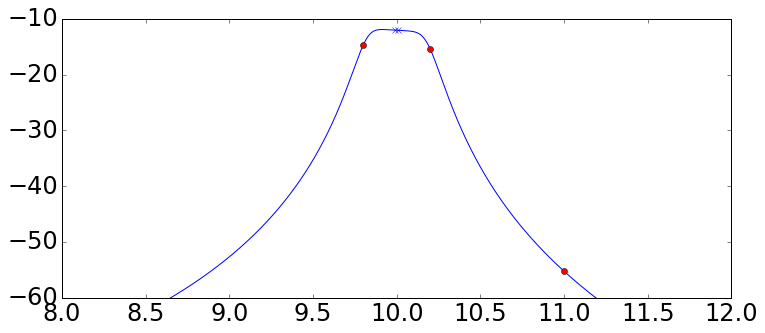

In [12]:
#Filtro 1FI
gif   = 1.  # atenuacion
mi    = 3  # numero de etapas
BWif  = 0.4 # ancho de banda  
kif = FiltroBT(fif,BWif,mi)
print(kif)

BW = BWif
k  = kif
fo = fif

fol= fol2
fci = fo - BW/2
fcs = fo + BW/2

fcos = fo+BWo/2
fcoi = fo-BWo/2

fimg = fol2+fif2

Ao = dB(Filtro([fo  ],[1],k,1))

print('|A(',fci ,' MHz)|=',dB(Filtro([fci ],[1],k,1))-Ao, 'dB') 
print('|A(',fcoi,' MHz)|=',dB(Filtro([fcoi],[1],k,1))-Ao, 'dB') 
print('|A(',fcos,' MHz)|=',dB(Filtro([fcos],[1],k,1))-Ao, 'dB') 
print('|A(',fcs ,' MHz)|=',dB(Filtro([fcs ],[1],k,1))-Ao, 'dB') 
print('|A(',fimg,' MHz)|=',dB(Filtro([fimg],[1],k,1))-Ao, 'dB') 

plt.plot(freq,20*np.log10(Filtro(freq,atest,k,1)))

plt.plot(fimg,dB(Filtro([fimg],[1],k,1)) ,'ro')
plt.plot(fci ,dB(Filtro([fci ],[1],k,1)) ,'ro')
plt.plot(fcs ,dB(Filtro([fcs ],[1],k,1)) ,'ro')
plt.plot(fcos,dB(Filtro([fcos],[1],k,1)) ,'bx')
plt.plot(fcoi,dB(Filtro([fcoi],[1],k,1)) ,'bx')
plt.xlim([8, 12])
plt.ylim([-60 , -10])
plt.show()


[(50.000000000000007, 0.49133974596215563), (25.0, 0.5), (50.000000000000007, 0.50866025403784443)]
|A( 0.49  MHz)|= [-2.68227858] dB
|A( 0.45  MHz)|= [-40.62722988] dB
|A( 0.55  MHz)|= [-43.18611569] dB
|A( 0.51  MHz)|= [-3.33376075] dB


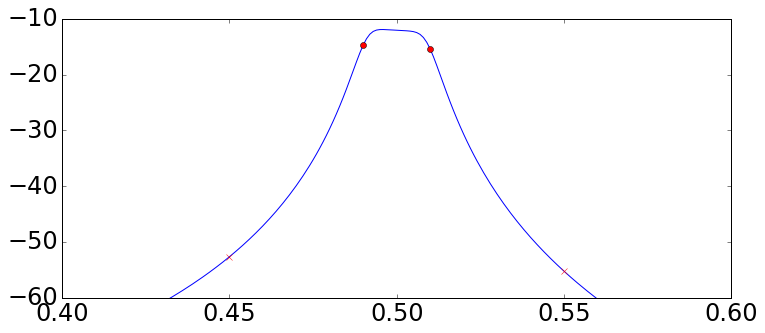

In [13]:
#Filtro 1FI
gif2   = 1.  # atenuacion
mi2    = 3  # numero de etapas
BWif2  = 0.02 # ancho de banda  
kif2 = FiltroBT(fif2,BWif2,mi2)
print(kif2)

k  = kif2
fo = fif2
BW = BWif2

fci  = fo-BWo/2
fcs  = fo+BWo/2
fcos = fo+dfch
fcoi = fo-dfch

Ao = dB(Filtro([fo  ],[1],k,1))

print('|A(',fci ,' MHz)|=',dB(Filtro([fci ],[1],k,1))-Ao, 'dB') 
print('|A(',fcoi,' MHz)|=',dB(Filtro([fcoi],[1],k,1))-Ao, 'dB') 
print('|A(',fcos,' MHz)|=',dB(Filtro([fcos],[1],k,1))-Ao, 'dB') 
print('|A(',fcs ,' MHz)|=',dB(Filtro([fcs ],[1],k,1))-Ao, 'dB') 


plt.plot(freq,20*np.log10(Filtro(freq,atest,k,1)))

plt.plot(fci ,dB(Filtro([fci ],[1],k,1)) ,'ro')
plt.plot(fcs ,dB(Filtro([fcs ],[1],k,1)) ,'ro')
plt.plot(fcos,dB(Filtro([fcos],[1],k,1)) ,'rx')
plt.plot(fcoi,dB(Filtro([fcoi],[1],k,1)) ,'rx')
plt.xlim([0.4, 0.6])
plt.ylim([-60 , -10])
plt.show()